In [ ]:
#Ajay 19303 CSE-D

# Data Loading

In [ ]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns
%matplotlib inline

from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import accuracy_score

In [ ]:
#Merging training and test data sets.
df1 = pd.read_csv("train.csv")
df2 = pd.read_csv("test.csv")

df1.dataframeName = 'train.csv'
df2.dataframeName = 'test.csv'

# df1["source"] = "train"
# df2["source"] = "test"
#adding new col to specify which dataset the entry belongs to

df = pd.concat([df1,df2])
print(df)
#combining datasets and reading data

      tBodyAcc-mean()-X  tBodyAcc-mean()-Y  tBodyAcc-mean()-Z  \
0              0.288585          -0.020294          -0.132905   
1              0.278419          -0.016411          -0.123520   
2              0.279653          -0.019467          -0.113462   
3              0.279174          -0.026201          -0.123283   
4              0.276629          -0.016570          -0.115362   
...                 ...                ...                ...   
2942           0.310155          -0.053391          -0.099109   
2943           0.363385          -0.039214          -0.105915   
2944           0.349966           0.030077          -0.115788   
2945           0.237594           0.018467          -0.096499   
2946           0.153627          -0.018437          -0.137018   

      tBodyAcc-std()-X  tBodyAcc-std()-Y  tBodyAcc-std()-Z  tBodyAcc-mad()-X  \
0            -0.995279         -0.983111         -0.913526         -0.995112   
1            -0.998245         -0.975300         -0.960322 

In [ ]:
df.to_csv('Final.csv')
#Saving the test+training dataset into a csv called Final.

In [ ]:
df.dtypes

tBodyAcc-mean()-X       float64
tBodyAcc-mean()-Y       float64
tBodyAcc-mean()-Z       float64
tBodyAcc-std()-X        float64
tBodyAcc-std()-Y        float64
                         ...   
angle(X,gravityMean)    float64
angle(Y,gravityMean)    float64
angle(Z,gravityMean)    float64
subject                   int64
Activity                 object
Length: 563, dtype: object

In [ ]:
map = {'STANDING': 1, 'SITTING':2, 'LAYING':3, 'WALKING':4, 'WALKING_DOWNSTAIRS':5, 'WALKING_UPSTAIRS':6}
#this will map activity values to numerical values
target_feature = 'Activity'
df[target_feature] = df[target_feature].map(map)

In [ ]:
df.dtypes

tBodyAcc-mean()-X       float64
tBodyAcc-mean()-Y       float64
tBodyAcc-mean()-Z       float64
tBodyAcc-std()-X        float64
tBodyAcc-std()-Y        float64
                         ...   
angle(X,gravityMean)    float64
angle(Y,gravityMean)    float64
angle(Z,gravityMean)    float64
subject                   int64
Activity                  int64
Length: 563, dtype: object

In [ ]:
# Checking any null values are present in the data
# No missing values are there
total = df.isnull().sum().sort_values(ascending = False)
percent = (df.isnull().sum()/df.isnull().count()*100).sort_values(ascending = False)
pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])


,Total,Percent
tBodyAcc-mean()-X,0,0.0
fBodyAccJerk-kurtosis()-Y,0,0.0
fBodyAccJerk-meanFreq()-X,0,0.0
fBodyAccJerk-meanFreq()-Y,0,0.0
fBodyAccJerk-meanFreq()-Z,0,0.0
...,...,...
tBodyGyroJerk-iqr()-Z,0,0.0
tBodyGyroJerk-iqr()-Y,0,0.0
tBodyGyroJerk-iqr()-X,0,0.0
tBodyGyroJerk-energy()-Z,0,0.0


# Standardization of the Data

In [ ]:
from sklearn import preprocessing
std_scale = preprocessing.StandardScaler().fit_transform(df)
data_df = pd.DataFrame(std_scale, columns=df.columns)
data_df.head()


,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity
0,0.210534,-0.068703,-0.452195,-0.883335,-0.945431,-0.744387,-0.874687,-0.944877,-0.773250,-0.868773,...,-0.299902,-0.357898,0.062039,-0.782988,-0.019034,-0.674432,0.382008,-0.016151,-1.745252,-1.389282
1,0.060208,0.035902,-0.275222,-0.890098,-0.929817,-0.860322,-0.883627,-0.927796,-0.858859,-0.884263,...,-0.789555,0.135993,-0.022538,-1.217721,1.470315,-0.681360,0.383148,-0.000121,-1.745252,-1.389282
2,0.078460,-0.046427,-0.085548,-0.883565,-0.913598,-0.906457,-0.878093,-0.904569,-0.908437,-0.876139,...,-0.461181,-0.375145,0.391762,0.134732,1.686961,-0.689471,0.384289,0.019214,-1.745252,-1.389282
3,0.071375,-0.227794,-0.270741,-0.885188,-0.946015,-0.935521,-0.879495,-0.943980,-0.938095,-0.876139,...,0.436736,-0.132194,-0.034739,1.010013,-0.982261,-0.688915,0.388536,0.024624,-1.745252,-1.389282
4,0.033738,0.031617,-0.121380,-0.889855,-0.940846,-0.935041,-0.882451,-0.937622,-0.940948,-0.883152,...,-0.263958,0.343504,0.268015,1.096950,-1.251689,-0.687381,0.399066,0.038649,-1.745252,-1.389282


# Data Summerization

In [ ]:
df.head

<bound method NDFrame.head of       tBodyAcc-mean()-X  tBodyAcc-mean()-Y  tBodyAcc-mean()-Z  \
0              0.288585          -0.020294          -0.132905   
1              0.278419          -0.016411          -0.123520   
2              0.279653          -0.019467          -0.113462   
3              0.279174          -0.026201          -0.123283   
4              0.276629          -0.016570          -0.115362   
...                 ...                ...                ...   
2942           0.310155          -0.053391          -0.099109   
2943           0.363385          -0.039214          -0.105915   
2944           0.349966           0.030077          -0.115788   
2945           0.237594           0.018467          -0.096499   
2946           0.153627          -0.018437          -0.137018   

      tBodyAcc-std()-X  tBodyAcc-std()-Y  tBodyAcc-std()-Z  tBodyAcc-mad()-X  \
0            -0.995279         -0.983111         -0.913526         -0.995112   
1            -0.998245       

In [ ]:
df.shape

(10299, 563)

In [ ]:
df.describe(include='all').T #Descriptive analysis

,count,mean,std,min,25%,50%,75%,max
tBodyAcc-mean()-X,10299.0,0.274347,0.067628,-1.0,0.262625,0.277174,0.288354,1.0
tBodyAcc-mean()-Y,10299.0,-0.017743,0.037128,-1.0,-0.024902,-0.017162,-0.010625,1.0
tBodyAcc-mean()-Z,10299.0,-0.108925,0.053033,-1.0,-0.121019,-0.108596,-0.097589,1.0
tBodyAcc-std()-X,10299.0,-0.607784,0.438694,-1.0,-0.992360,-0.943030,-0.250293,1.0
tBodyAcc-std()-Y,10299.0,-0.510191,0.500240,-1.0,-0.976990,-0.835032,-0.057336,1.0
...,...,...,...,...,...,...,...,...
"angle(X,gravityMean)",10299.0,-0.496522,0.511158,-1.0,-0.817288,-0.715631,-0.521503,1.0
"angle(Y,gravityMean)",10299.0,0.063255,0.305468,-1.0,0.002151,0.182028,0.250790,1.0
"angle(Z,gravityMean)",10299.0,-0.054284,0.268898,-1.0,-0.131880,-0.003882,0.102970,1.0
subject,10299.0,16.146422,8.679067,1.0,9.000000,17.000000,24.000000,30.0


In [ ]:
df['Activity'].value_counts().shape

(6,)

In [ ]:
df['Activity'].value_counts().head(3)


3    1944
1    1906
2    1777
Name: Activity, dtype: int64

In [ ]:
count_of_each_activity = np.array(df.value_counts())

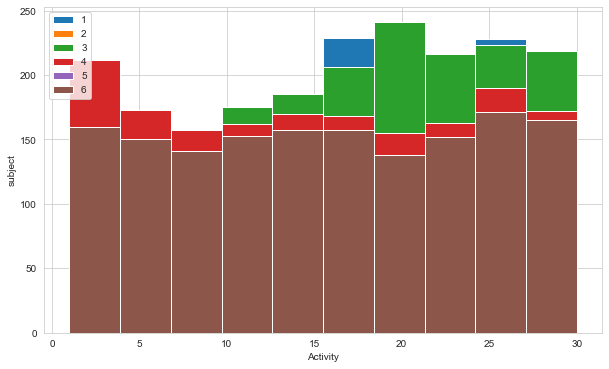

In [ ]:
# Histogram analysis Count and Age
plt.figure(figsize=(10,6))
df.groupby('Activity')['subject'].hist(legend=True)
plt.xlabel('Activity')
plt.ylabel('subject')
plt.show()


<BarContainer object of 3 artists>

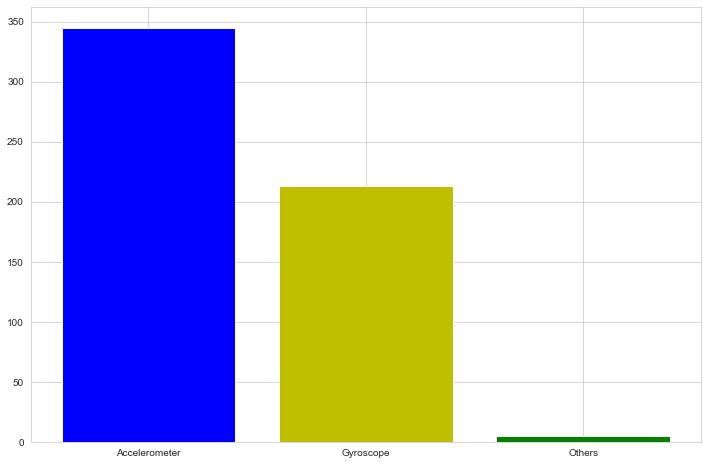

In [ ]:
Acc = 0
Gyro = 0
other = 0
for value in df.columns:
    if "Acc" in str(value):
        Acc += 1
    elif "Gyro" in str(value):
        Gyro += 1
    else:
        other += 1
plt.figure(figsize=(12,8))
plt.bar(['Accelerometer', 'Gyroscope', 'Others'],[Acc,Gyro,other],color=('b','y','g'))

[]

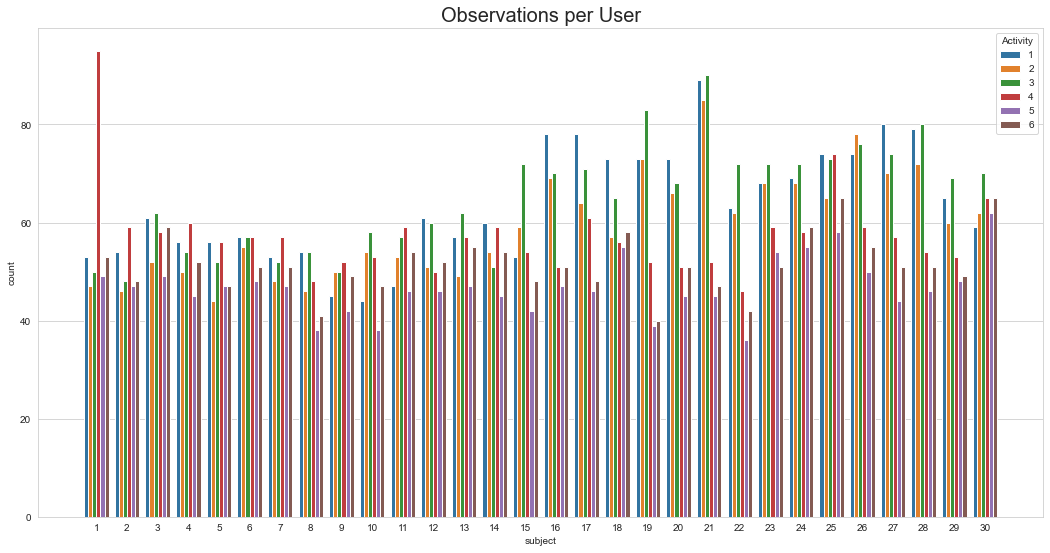

In [ ]:
sns.set_style('whitegrid')
plt.figure(figsize=(18,9))
plt.title('Observations per User', fontsize=20)
sns.countplot(x='subject', hue='Activity', data=df)
plt.plot()
#1 is for Standing
#2 is for Sitting
#3 is for Laying
#4 is for Walking
#5 is for Walking_Upstair
#6 is for Walking_Downstair


# Data Interpretation

In [ ]:
This dataset contains 10299 records.
There are no null values and all the values are numeric.
The dataset consists of accelerometer and gyroscope sensor values for each record.
Each column has a subject number and activity which defines the type of activity.
Each activity is mapped to a specific number.
STANDING: 1, SITTING:2, LAYING:3, WALKING:4, WALKING_DOWNSTAIRS:5, WALKING_UPSTAIRS:6

In [ ]:
df.to_csv('Cleaned_data.csv')

In [ ]:
df.shape

(10299, 563)